In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
survival_rate = df['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


In [139]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


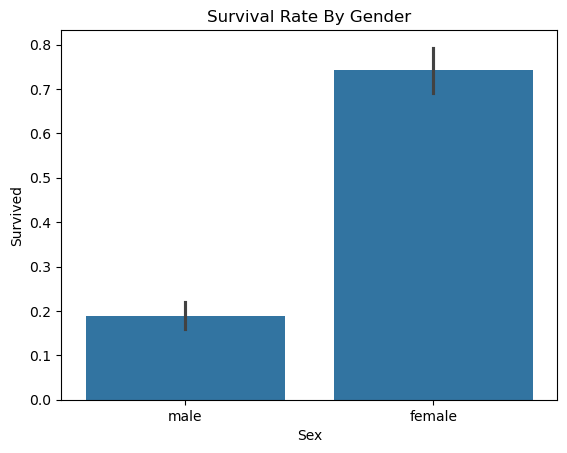

In [23]:
sns.barplot(x='Sex', y='Survived',data=df)
plt.title("Survival Rate By Gender")
plt.show()

In [29]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

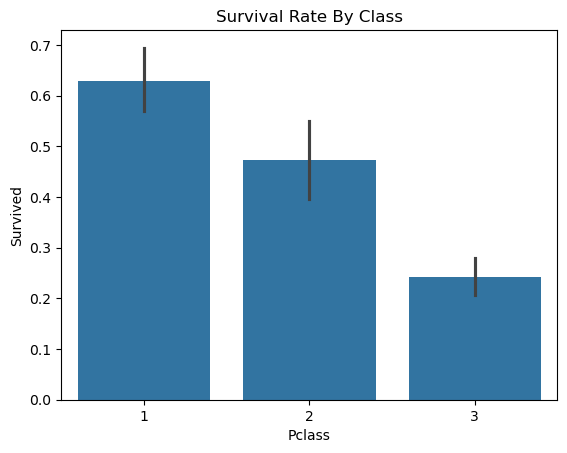

In [33]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate By Class")
plt.show()

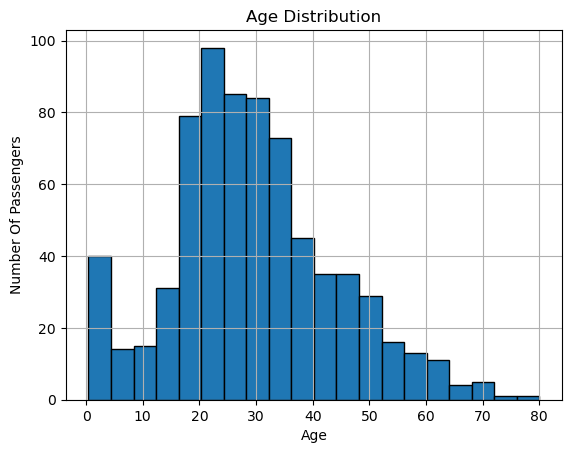

In [37]:
df['Age'].hist(bins=20,edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number Of Passengers")
plt.show()

In [39]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [47]:
missing = df[['Age', 'Cabin']].isnull().sum()
print(missing)

Age      177
Cabin    687
dtype: int64


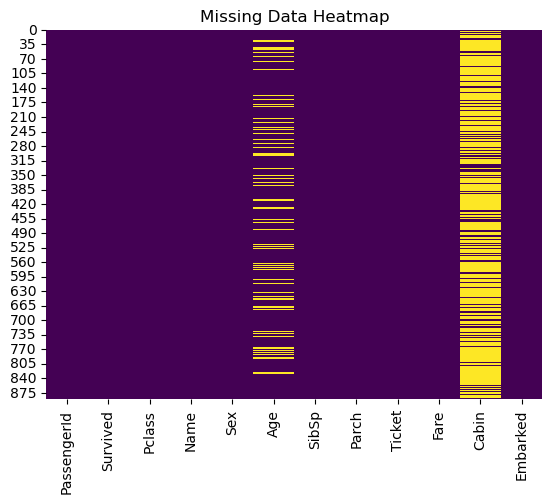

In [51]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [53]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.groupby('FamilySize')['Survived'].mean()

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

C:\Users\Soren\AppData\Local\Temp\ipykernel_16808\2168422010.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, ci=None)


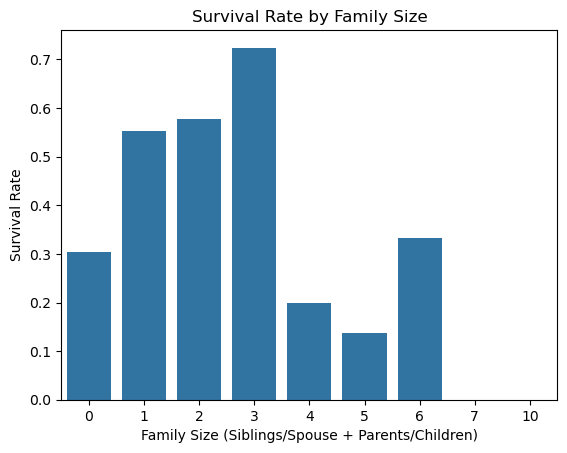

In [67]:
sns.barplot(x='FamilySize', y='Survived', data=df, ci=None)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size (Siblings/Spouse + Parents/Children)")
plt.ylabel("Survival Rate")
plt.show()

In [69]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

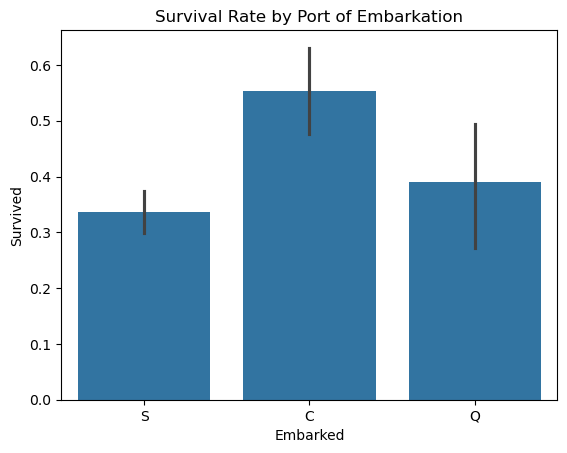

In [71]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show

In [79]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'])
df.groupby('AgeGroup')['Survived'].mean()


C:\Users\Soren\AppData\Local\Temp\ipykernel_16808\3515295750.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child          0.579710
Teen           0.381818
Adult          0.397403
Middle-aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64

<Axes: xlabel='AgeGroup', ylabel='Survived'>

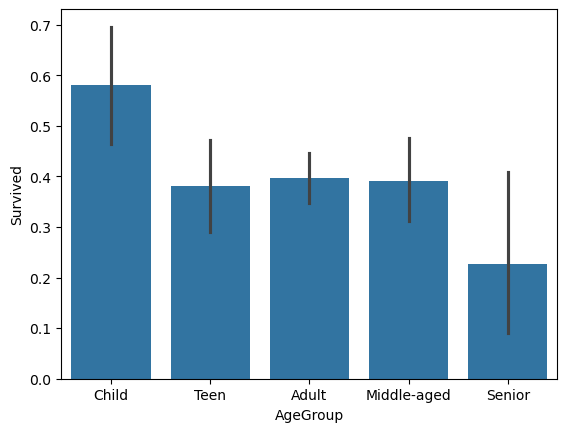

In [87]:
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator='mean')


In [91]:
df[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


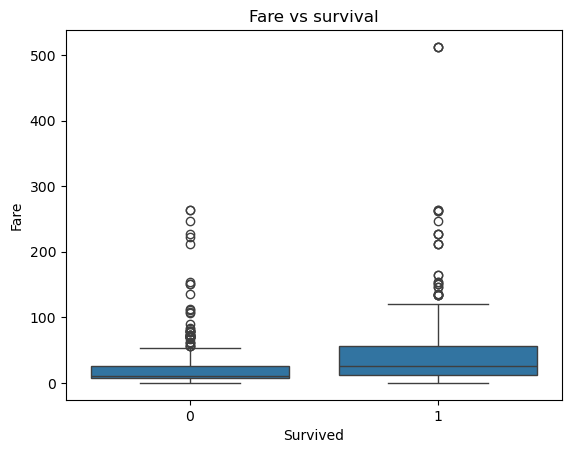

In [93]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs survival")
plt.show()

In [95]:
df.sort_values(by = 'Fare', ascending=False)[['Name','Fare']].head()

,Name,Fare
258,"Ward, Miss. Anna",512.3292
737,"Lesurer, Mr. Gustave J",512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
88,"Fortune, Miss. Mabel Helen",263.0000
27,"Fortune, Mr. Charles Alexander",263.0000


In [97]:
df['IsChild'] = df['Age'] < 12
df.groupby('IsChild')['Survived'].mean()

IsChild
False    0.368165
True     0.573529
Name: Survived, dtype: float64

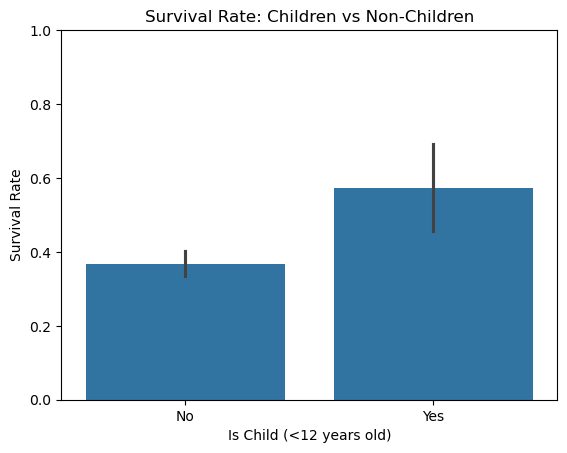

In [101]:
sns.barplot(x='IsChild', y='Survived', data=df)
plt.title("Survival Rate: Children vs Non-Children")
plt.xlabel("Is Child (<12 years old)")
plt.ylabel("Survival Rate")
plt.xticks([0, 1], ["No", "Yes"])
plt.ylim(0, 1)
plt.show()

In [103]:
df.pivot_table(index='Sex', columns='Pclass', values='Survived')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


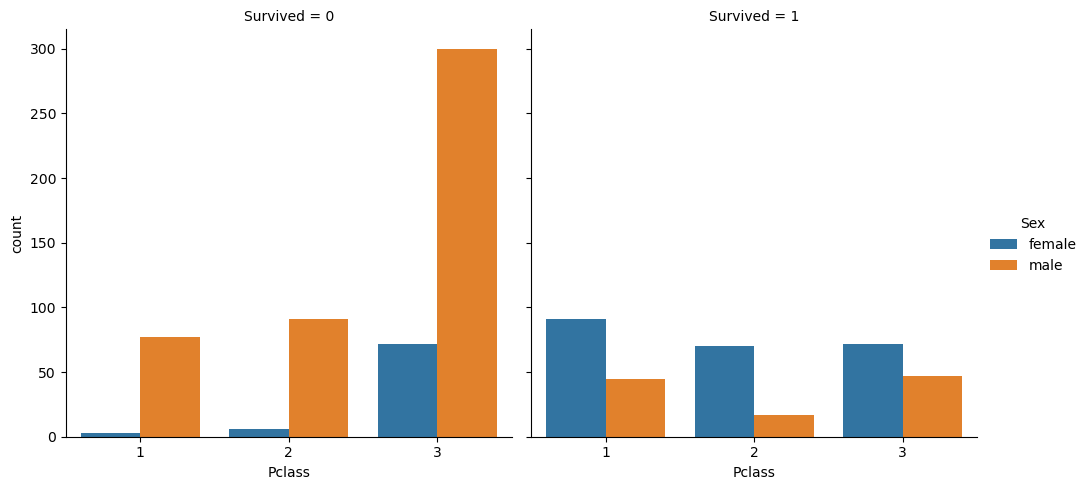

In [105]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=df)

In [113]:
df.groupby('Embarked')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Q,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
S,644.0,27.079812,35.887993,0.0000,8.05000,13.00,27.900000,263.0000


<Axes: xlabel='Embarked', ylabel='Fare'>

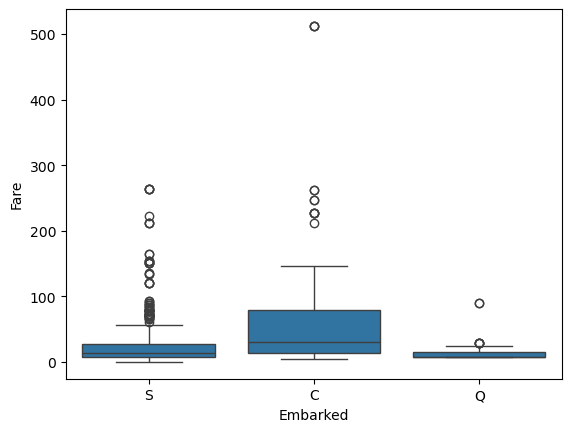

In [115]:
sns.boxplot(x='Embarked', y='Fare', data=df)


In [119]:
df[['Age', 'Fare']].dropna().corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [123]:
df['TicketPrefix'] = df['Ticket'].apply(lambda x: str(x).split()[0] if not str(x).isdigit() else 'None')
df.groupby('TicketPrefix')['Survived'].mean().sort_values(ascending=False)

TicketPrefix
SW/PP         1.000000
SO/C          1.000000
SC            1.000000
S.W./PP       1.000000
F.C.C.        0.800000
SC/AH         0.666667
PP            0.666667
PC            0.650000
S.C./PARIS    0.500000
STON/O2.      0.500000
SC/Paris      0.500000
P/PP          0.500000
WE/P          0.500000
C.A.          0.481481
STON/O        0.416667
SC/PARIS      0.400000
C             0.400000
None          0.384266
LINE          0.250000
A/5.          0.142857
SOTON/OQ      0.142857
SOTON/O.Q.    0.125000
CA.           0.125000
W./C.         0.111111
A/5           0.100000
F.C.          0.000000
SOTON/O2      0.000000
SCO/W         0.000000
A/4           0.000000
W.E.P.        0.000000
W/C           0.000000
A/4.          0.000000
A4.           0.000000
A/S           0.000000
S.P.          0.000000
S.O.P.        0.000000
S.O.C.        0.000000
S.O./P.P.     0.000000
A.5.          0.000000
S.C./A.4.     0.000000
C.A./SOTON    0.000000
CA            0.000000
Fa            0.00000